# Visualizing Stock Trends by Using a Line Plot

<b> Import the necessary modules </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<b> Use pandas to read the datasets (GOOGL_data.csv, FB_data.csv, AAPL_data.csv, AMZN_data.csv, and MSFT_data.csv) located in the Datasets folder </b>

In [2]:
google = pd.read_csv('Datasets/GOOGL_data.csv')
google.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL


In [3]:
fb = pd.read_csv('Datasets/FB_data.csv')
fb.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,28.89,29.17,28.51,28.545,37662614,FB
1,2013-02-11,28.61,28.68,28.04,28.260,36979533,FB


In [4]:
apple = pd.read_csv('Datasets/AAPL_data.csv')
apple.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL


In [5]:
amazon = pd.read_csv('Datasets/AMZN_data.csv')
amazon.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,261.4,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.2,263.25,256.600,257.21,3403403,AMZN


In [6]:
microsoft = pd.read_csv('Datasets/MSFT_data.csv')
microsoft.head(2)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT


<b> Use Matplotlib to create a line chart visualizing the closing prices for the past 5 years (whole data sequence) for all five companies. Add labels, titles, and a legend to make the visualization self-explanatory </b>

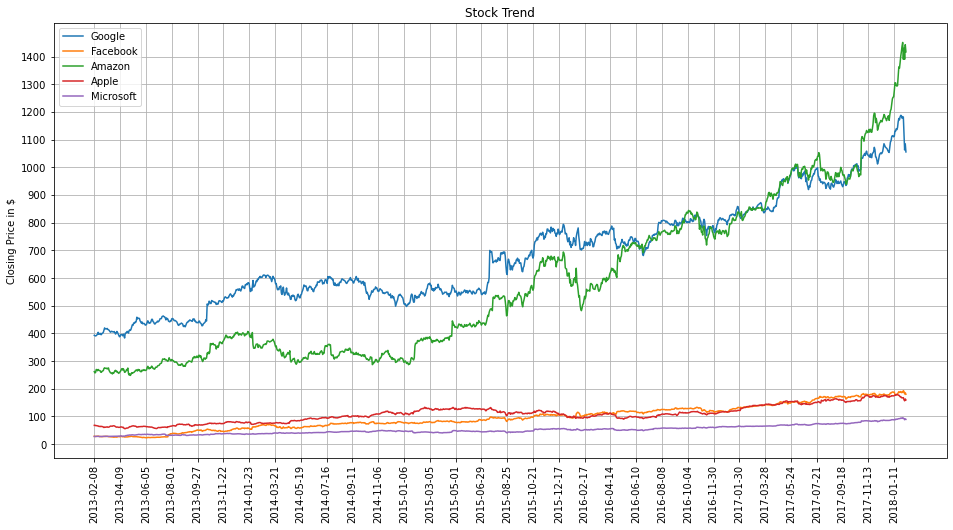

In [7]:
plt.figure(figsize=(16, 8))
plt.title('Stock Trend')
plt.plot('date', 'close', data=google, label='Google')
plt.plot('date', 'close', data=fb, label='Facebook')
plt.plot('date', 'close', data=amazon, label='Amazon')
plt.plot('date', 'close', data=apple, label='Apple')
plt.plot('date', 'close', data=microsoft, label='Microsoft')
plt.xticks(np.arange(0, 1260, 40), rotation=90)
plt.yticks(np.arange(0, 1450, 100))
plt.ylabel('Closing Price in $')
plt.legend()
plt.grid()
plt.show()

# Creating a Bar Plot for Movie Comparison

<b> Load the Data </b>

In [8]:
movies = pd.read_csv('Datasets/movie_scores.csv')
movies

,Unnamed: 0,MovieTitle,Tomatometer,AudienceScore
0,0,The Shape of Water,91,73
1,1,Black Panther,97,79
2,2,Dunkirk,92,81
3,3,The Martian,91,91
4,4,The Hobbit: An Unexpected Journey,64,83


<b> Use Matplotlib to create a visually appealing bar plot comparing the two scores for all five movies </b>

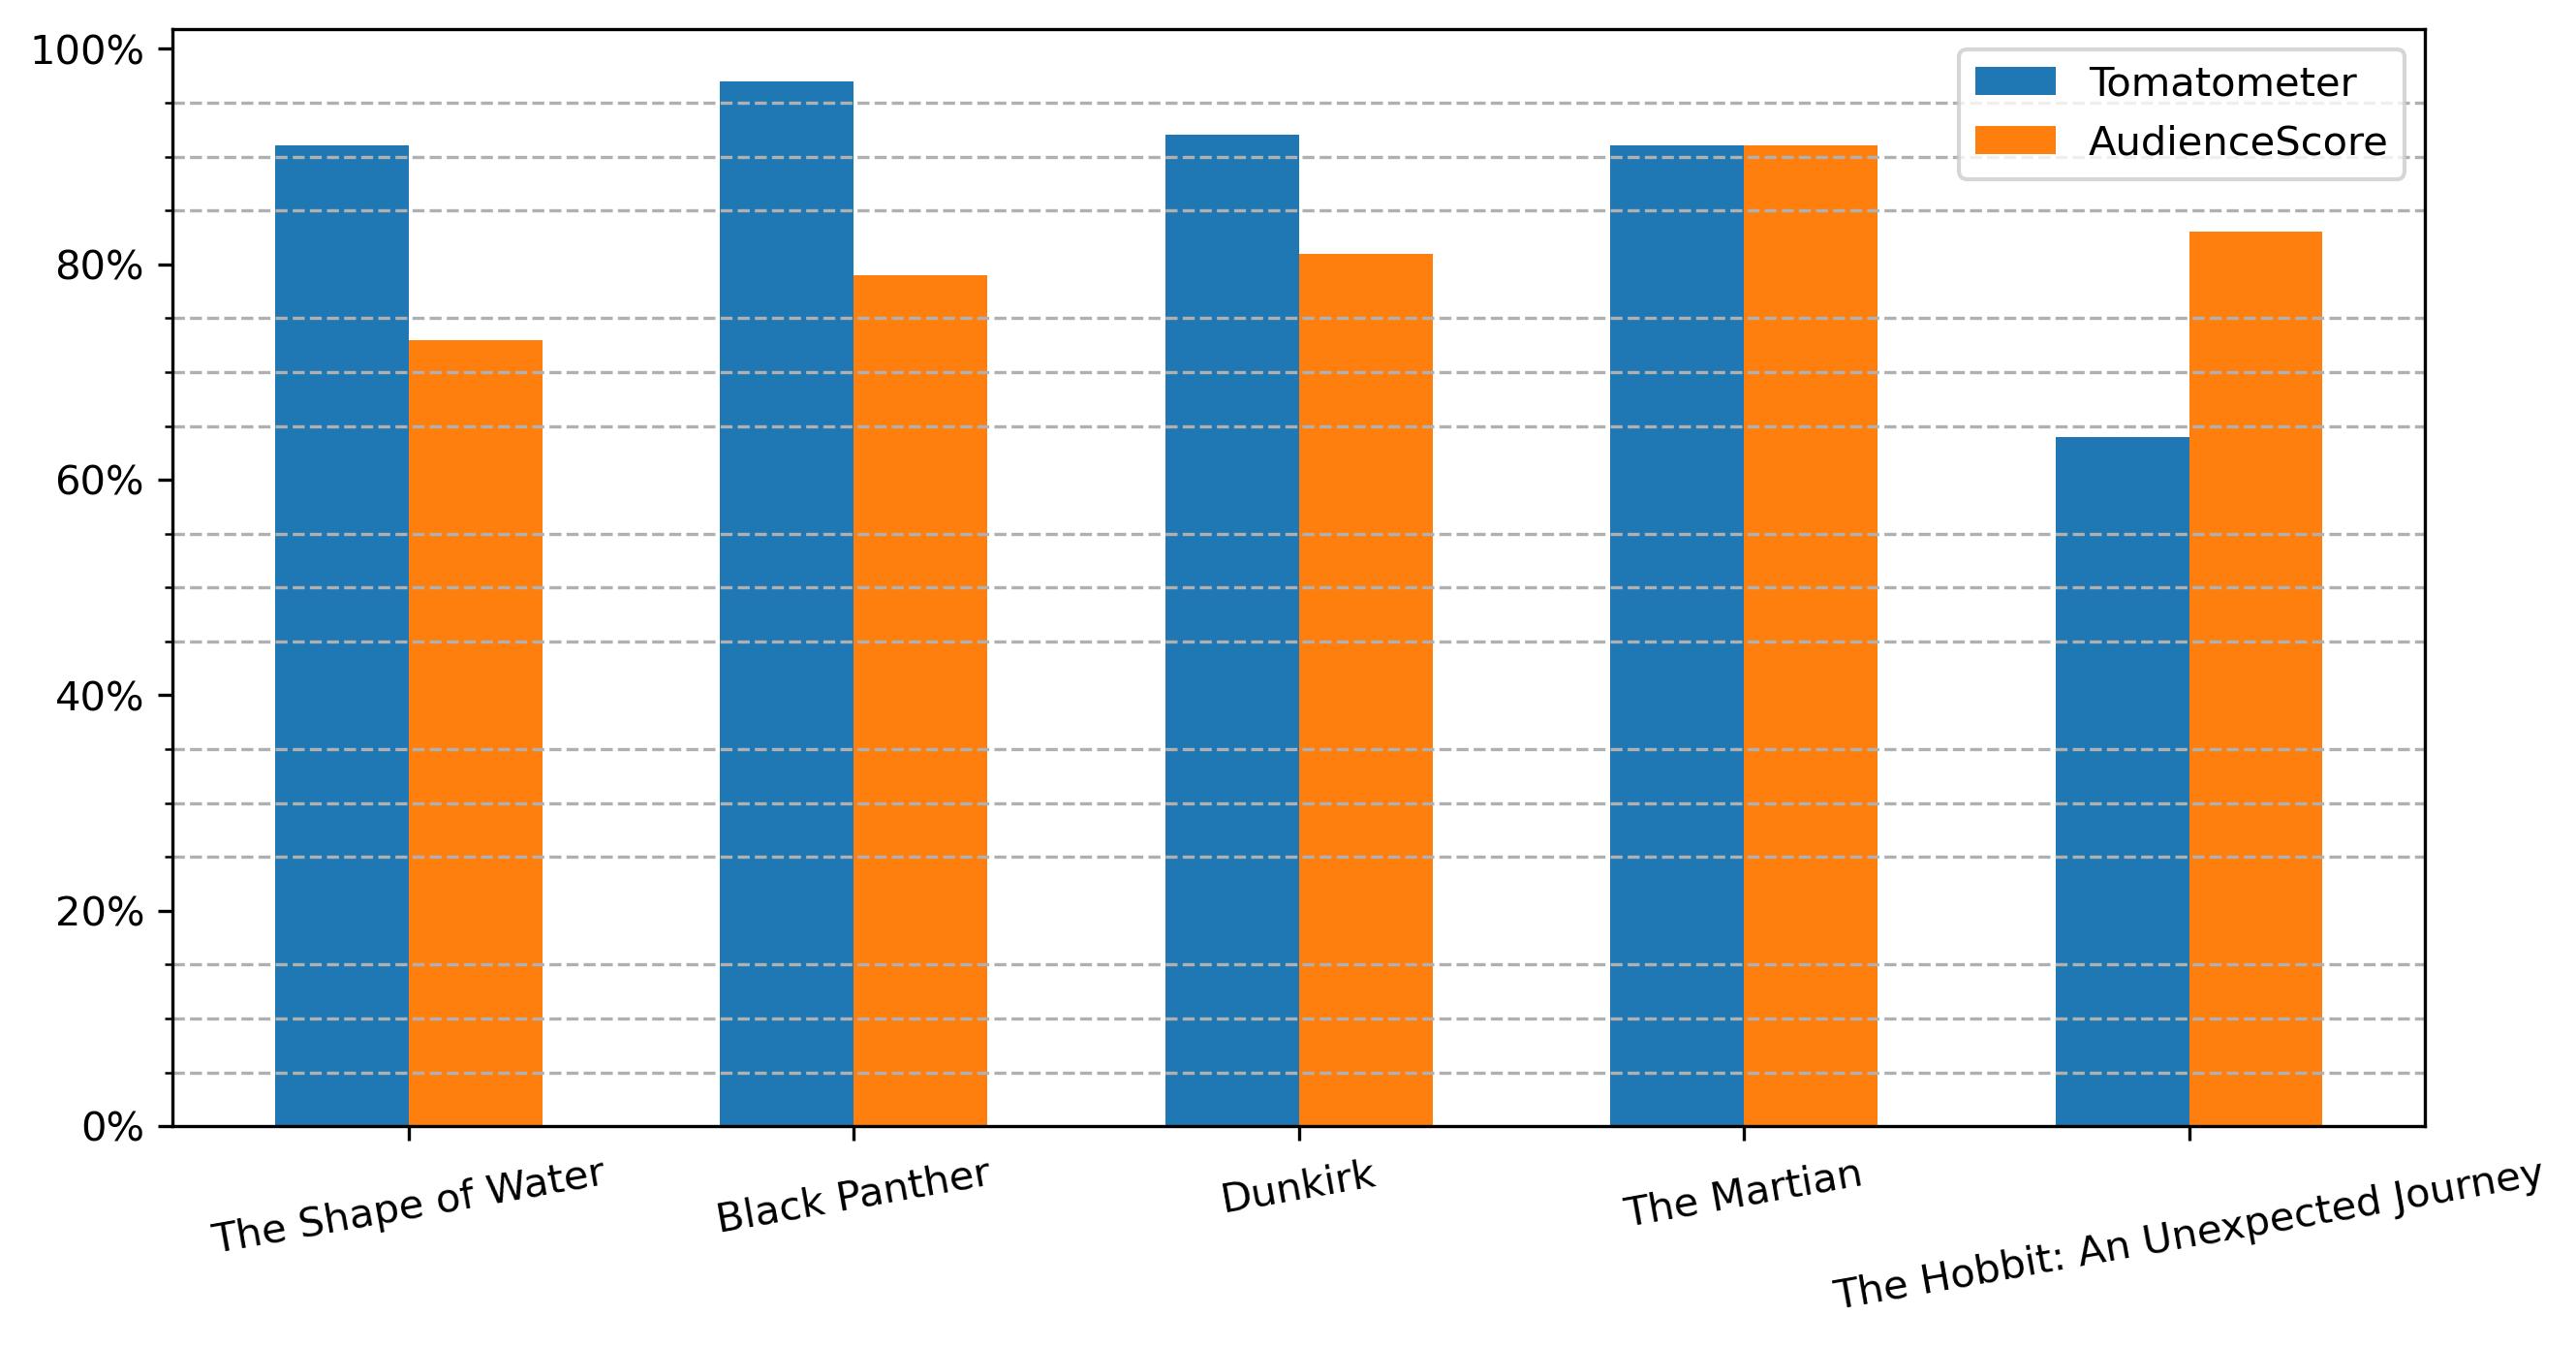

In [9]:
plt.figure(figsize=(10, 5), dpi=300)
# create a bar plot
width = 0.3
pos = np.arange(len(movies['MovieTitle']))
plt.bar(pos-width/2, movies['Tomatometer'], width=width, label='Tomatometer')
plt.bar(pos+width/2, movies['AudienceScore'], width=width, label='AudienceScore')
# specify ticks
plt.xticks(pos, rotation=10)
plt.yticks(np.arange(0, 101, 20))
# setting tick labels
ax = plt.gca()
ax.set_xticklabels(movies['MovieTitle'])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
# add minor ticks
ax.set_yticks(np.arange(0, 100, 5), minor=True)
# add horizontal grid
ax.yaxis.grid(which='minor', linestyle='--')
# add legend
plt.legend()
plt.show()

# Creating a Stacked Bar Plot to Visualize Restaurant Performance

<b> Import all the necessary dependencies and load the tips dataset <b>

In [10]:
import seaborn as sns

In [11]:
bills = sns.load_dataset('tips')
bills.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<b> Use the given dataset and create a matrix where the elements contain the sum of the total bills for each day and split according to smokers/non-smokers </b>

In [12]:
days = ['Thur', 'Fri', 'Sat', 'Sun']
days_range = np.arange(len(days))
smoker = ['Yes', 'No']
bills_by_days = [bills[bills['day'] == day] for day in days]
bills_by_days_smoker = [[bills_by_days[day][bills_by_days[day]['smoker'] == s] for s in smoker] for day in days_range]
total_by_days_smoker = [[bills_by_days_smoker[day][s]['total_bill'].sum() for s in range(len(smoker))] for day in days_range]
totals = np.asarray(total_by_days_smoker)

<b> Create a stacked bar plot, stacking the summed total bills separated according to smoker and non-smoker for each day. Add a legend, labels, and a title </b>

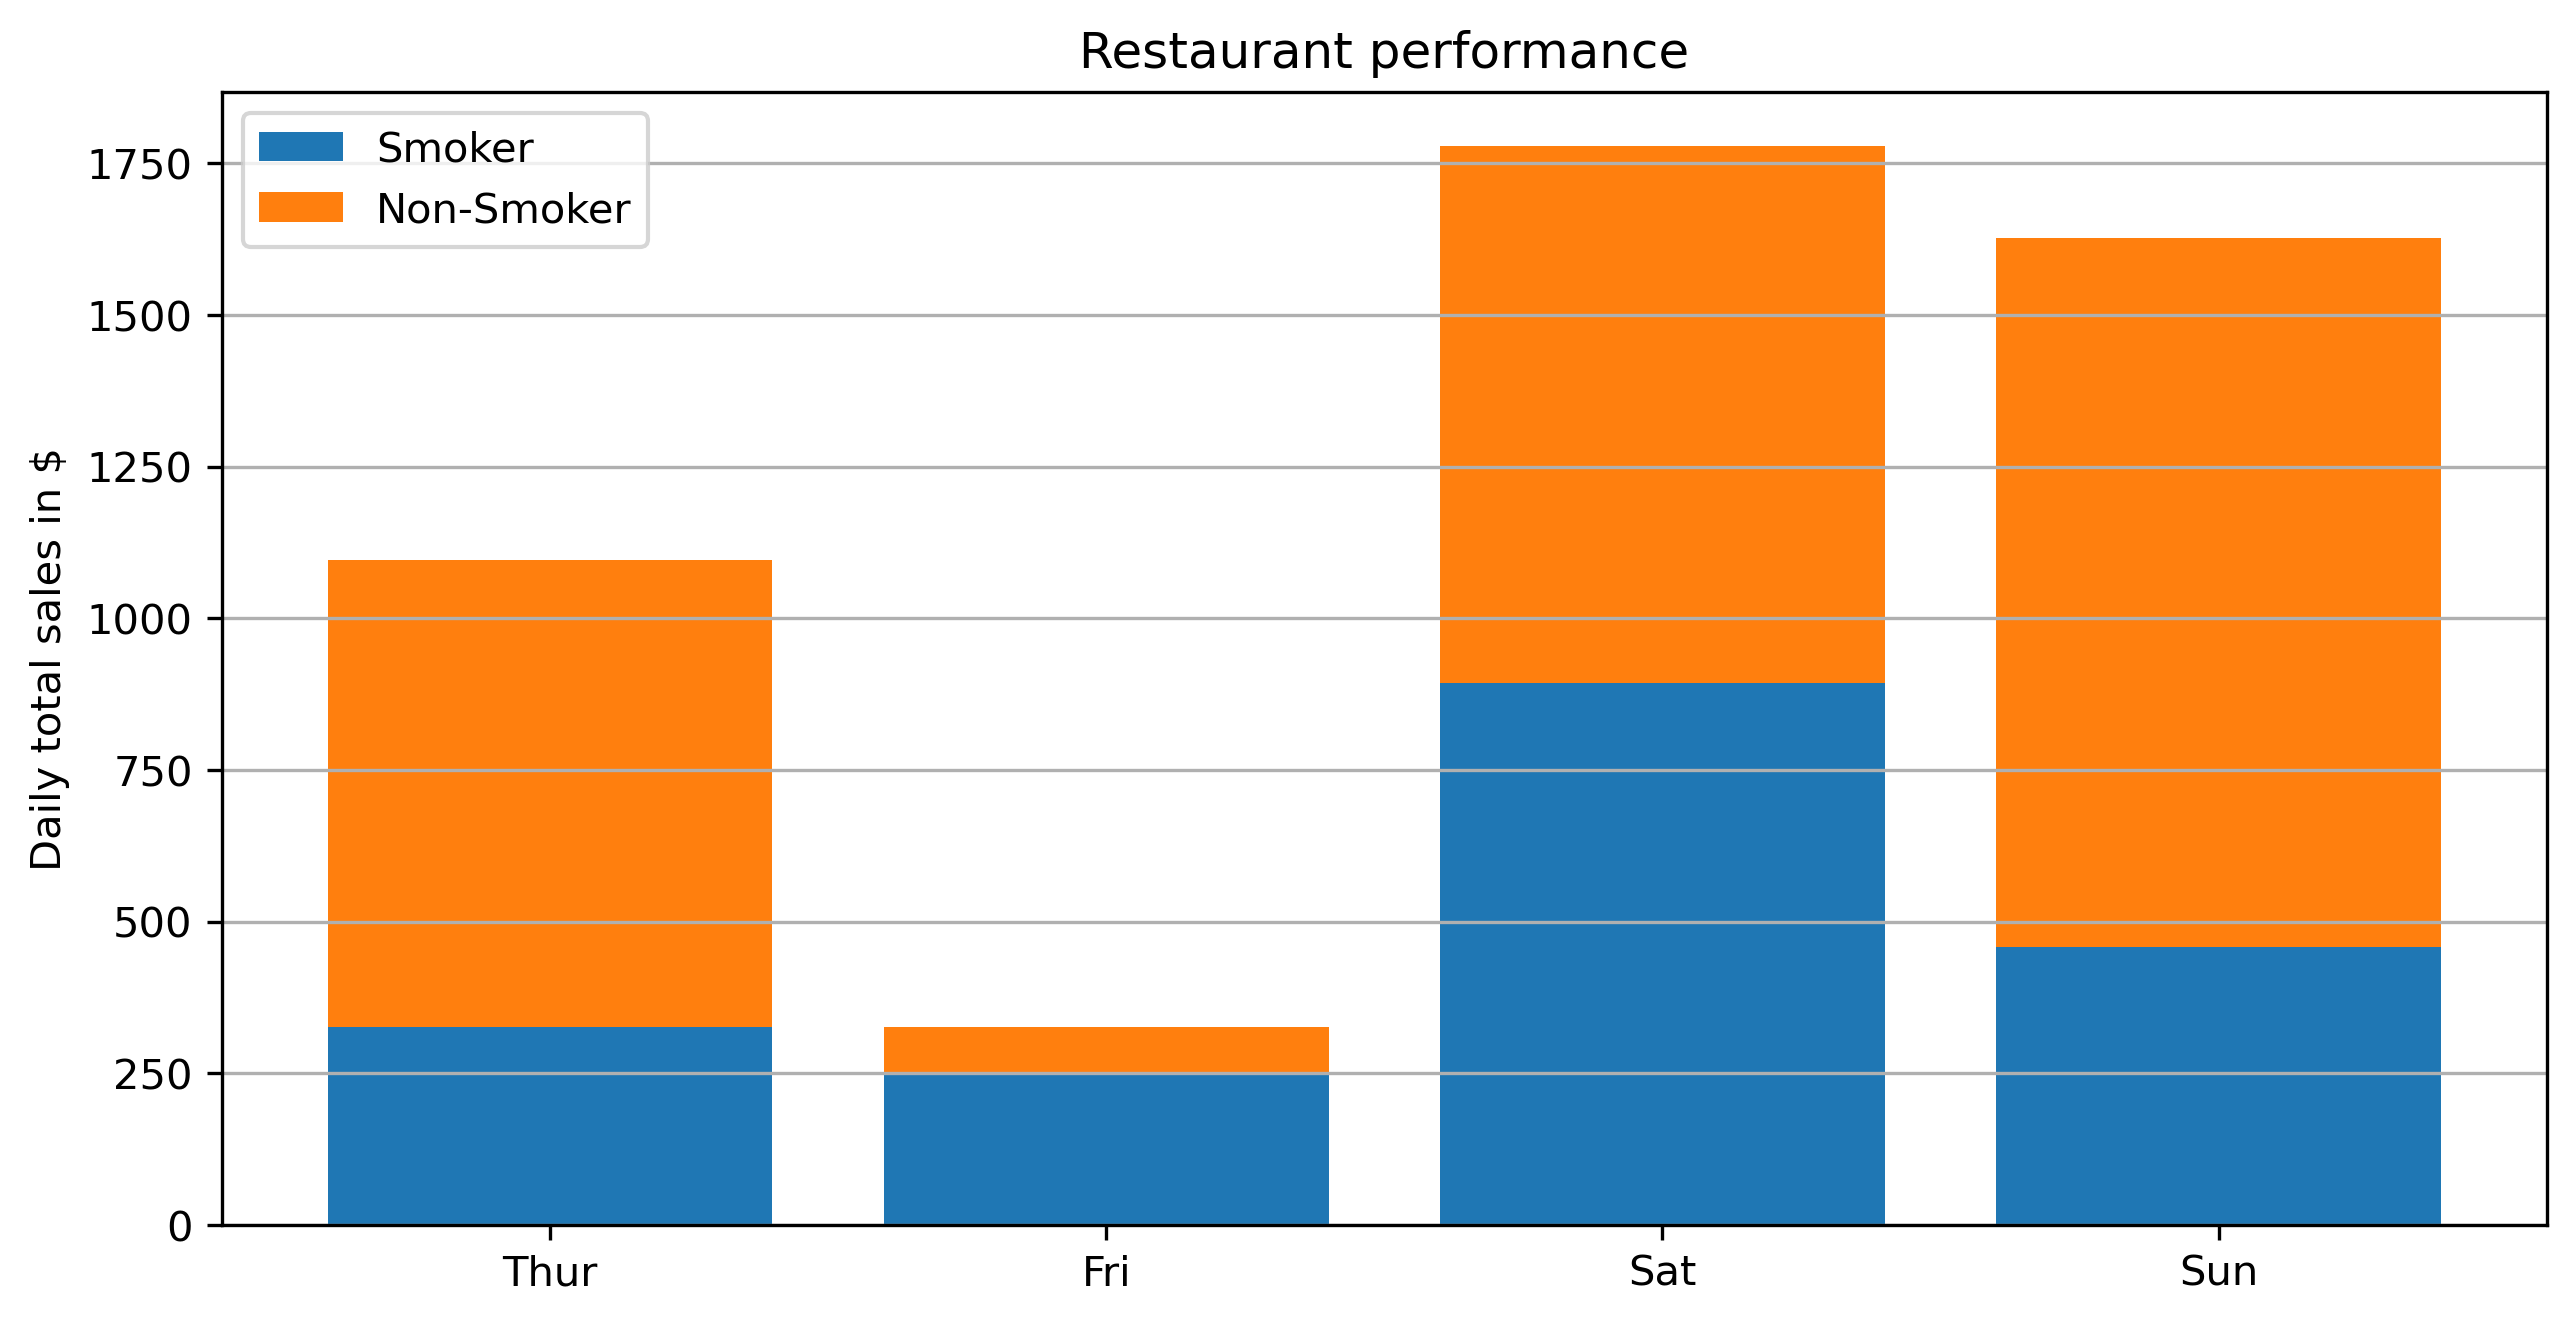

In [13]:
plt.figure(figsize=(10, 5), dpi=300)
plt.title('Restaurant performance')
plt.bar(days_range, totals[:, 0], label='Smoker')
plt.bar(days_range, totals[:, 1], label='Non-Smoker', bottom=totals[:, 0])
plt.xticks(days_range)
plt.ylabel('Daily total sales in $')
plt.legend()
ax = plt.gca()
ax.yaxis.grid()
ax.set_xticklabels(days)
plt.show()

# Comparing Smartphone Sales Units Using a Stacked Area Chart

<b> Use pandas to read the smartphone_sales.csv </b>

In [14]:
sales = pd.read_csv('Datasets/smartphone_sales.csv')
sales.head()

,Unnamed: 0,Quarter,Apple,Samsung,Huawei,Xiaomi,OPPO
0,0,3Q16,43001,71734,32490,14926,24591
1,1,4Q16,77039,76783,40804,15751,26705
2,2,1Q17,51993,78776,34181,12707,30922
3,3,2Q17,44315,82855,35964,21179,26093
4,4,3Q17,45442,85605,36502,26853,29449


<b> Create a visually appealing stacked area chart. Add a legend, labels, and a title </b>

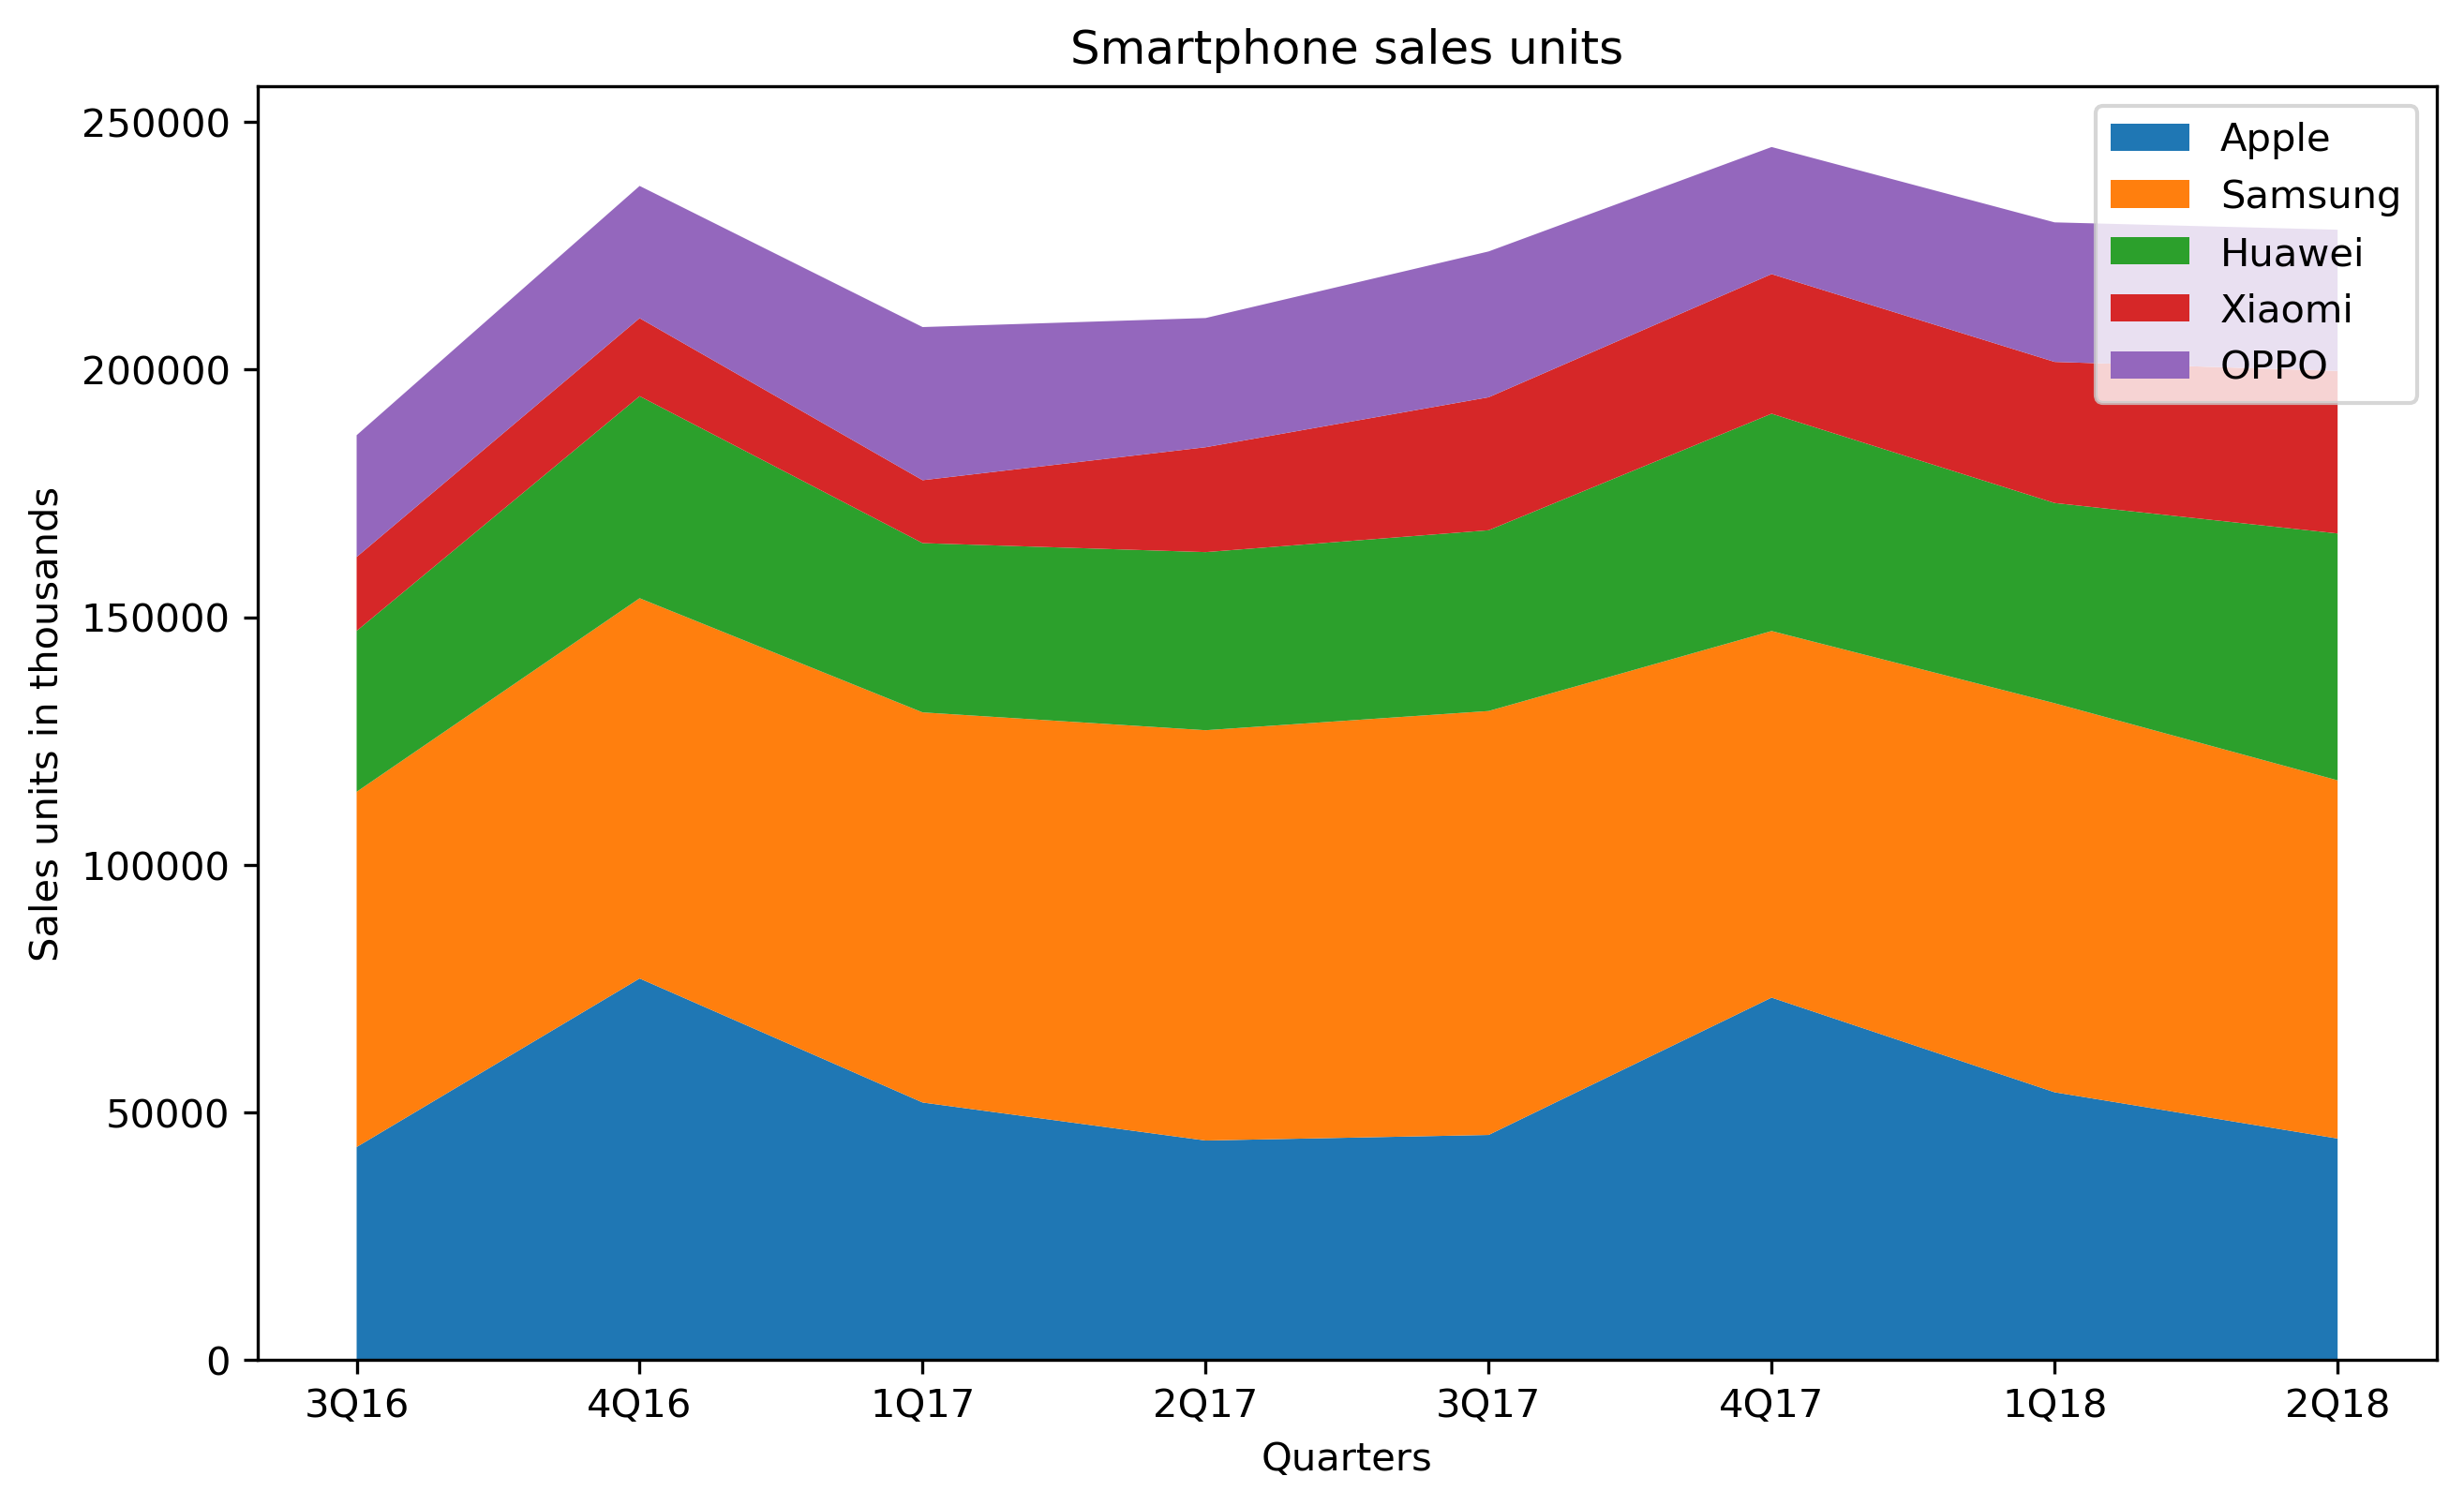

In [15]:
plt.figure(figsize=(10, 6), dpi=300)
labels = sales.columns[2:]
plt.stackplot(sales['Quarter'], sales['Apple'], sales['Samsung'], sales['Huawei'], sales['Xiaomi'], sales['OPPO'],
             labels=labels)
plt.title('Smartphone sales units')
plt.xlabel('Quarters')
plt.ylabel('Sales units in thousands')
plt.legend()
plt.show()

# Using a Histogram and a Box Plot to Visualize Intelligence Quotient

<b> Use the following IQ scores to create the plots </b>

In [16]:
iq_scores = [126,  89,  90, 101, 102,  74,  93, 101,  66, 120, 108,
             97,  98, 105, 119,  92, 113,  81, 104, 108,  83, 102,
             105, 111, 102, 107, 103,  89,  89, 110,  71, 110, 120,
             85, 111,  83, 122, 120, 102, 84, 118, 100, 100, 114, 
             81, 109,  69,  97,  95, 106, 116, 109, 114,  98,  90,
             92,  98,  91,  81,  85,  86, 102,  93, 112,  76, 89,
             110,  75, 100,  90,  96,  94, 107, 108,  95,  96,  96,
             114, 93,  95, 117, 141, 115,  95,  86, 100, 121, 103,
             66,  99,  96, 111, 110, 105, 110, 91, 112, 102, 112,  75]

<b> Plot a histogram with 10 bins for the given IQ scores. Visualize the mean as a vertical solid red line, and the standard deviation using dashed vertical lines. Add labels and a title </b>

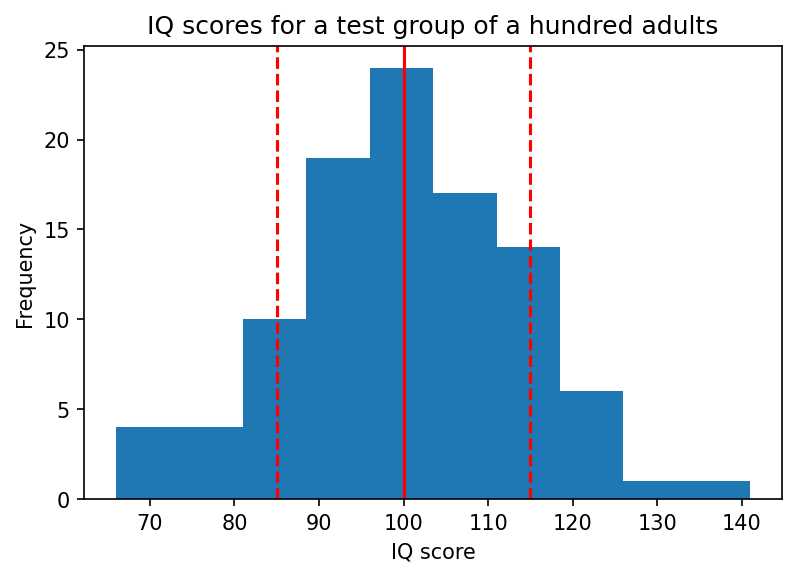

In [17]:
plt.figure(figsize=(6, 4), dpi=150)
plt.hist(iq_scores, bins=10)
plt.axvline(x=100, color='r')
plt.axvline(x=115, color='r', linestyle='--')
plt.axvline(x=85, color='r', linestyle='--')
plt.xlabel('IQ score')
plt.ylabel('Frequency')
plt.title('IQ scores for a test group of a hundred adults')
plt.show()

<b> Create a box plot to visualize the same IQ scores. Add labels and a title </b>

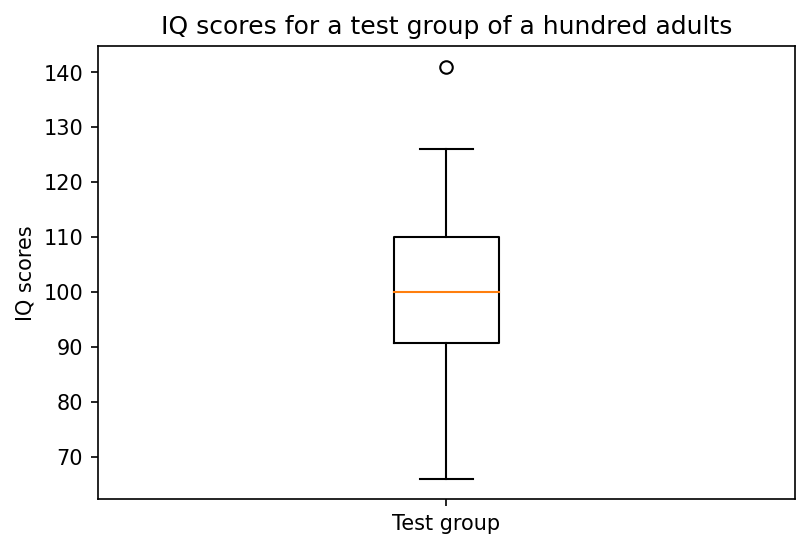

In [18]:
plt.figure(figsize=(6, 4), dpi=150)
plt.boxplot(iq_scores)
plt.title('IQ scores for a test group of a hundred adults')
ax = plt.gca()
ax.set_xticklabels(['Test group'])
plt.ylabel('IQ scores')
plt.show()

<b> Create a box plot for each of the IQ scores of the different test groups. Add labels and a title. The following are IQ scores for different test groups that we can use as data </b>

In [19]:
group_a = [118, 103, 125, 107, 111,  96, 104,  97,  96, 114,  96,  75, 114,
       107,  87, 117, 117, 114, 117, 112, 107, 133,  94,  91, 118, 110,
       117,  86, 143,  83, 106,  86,  98, 126, 109,  91, 112, 120, 108,
       111, 107,  98,  89, 113, 117,  81, 113, 112,  84, 115,  96,  93,
       128, 115, 138, 121,  87, 112, 110,  79, 100,  84, 115,  93, 108,
       130, 107, 106, 106, 101, 117,  93,  94, 103, 112,  98, 103,  70,
       139,  94, 110, 105, 122,  94,  94, 105, 129, 110, 112,  97, 109,
       121, 106, 118, 131,  88, 122, 125,  93,  78]
group_b = [126,  89,  90, 101, 102,  74,  93, 101,  66, 120, 108,  97,  98,
            105, 119,  92, 113,  81, 104, 108,  83, 102, 105, 111, 102, 107,
            103,  89,  89, 110,  71, 110, 120,  85, 111,  83, 122, 120, 102,
            84, 118, 100, 100, 114,  81, 109,  69,  97,  95, 106, 116, 109,
            114,  98,  90,  92,  98,  91,  81,  85,  86, 102,  93, 112,  76,
            89, 110,  75, 100,  90,  96,  94, 107, 108,  95,  96,  96, 114,
            93,  95, 117, 141, 115,  95,  86, 100, 121, 103,  66,  99,  96,
            111, 110, 105, 110,  91, 112, 102, 112,  75]
group_c = [108,  89, 114, 116, 126, 104, 113,  96,  69, 121, 109, 102, 107,
       122, 104, 107, 108, 137, 107, 116,  98, 132, 108, 114,  82,  93,
        89,  90,  86,  91,  99,  98,  83,  93, 114,  96,  95, 113, 103,
        81, 107,  85, 116,  85, 107, 125, 126, 123, 122, 124, 115, 114,
        93,  93, 114, 107, 107,  84, 131,  91, 108, 127, 112, 106, 115,
        82,  90, 117, 108, 115, 113, 108, 104, 103,  90, 110, 114,  92,
       101,  72, 109,  94, 122,  90, 102,  86, 119, 103, 110,  96,  90,
       110,  96,  69,  85, 102,  69,  96, 101,  90]
group_d = [ 93,  99,  91, 110,  80, 113, 111, 115,  98,  74,  96,  80,  83,
       102,  60,  91,  82,  90,  97, 101,  89,  89, 117,  91, 104, 104,
       102, 128, 106, 111,  79,  92,  97, 101, 106, 110,  93,  93, 106,
       108,  85,  83, 108,  94,  79,  87, 113, 112, 111, 111,  79, 116,
       104,  84, 116, 111, 103, 103, 112,  68,  54,  80,  86, 119,  81,
        84,  91,  96, 116, 125,  99,  58, 102,  77,  98, 100,  90, 106,
       109, 114, 102, 102, 112, 103,  98,  96,  85,  97, 110, 131,  92,
        79, 115, 122,  95, 105,  74,  85,  85,  95]

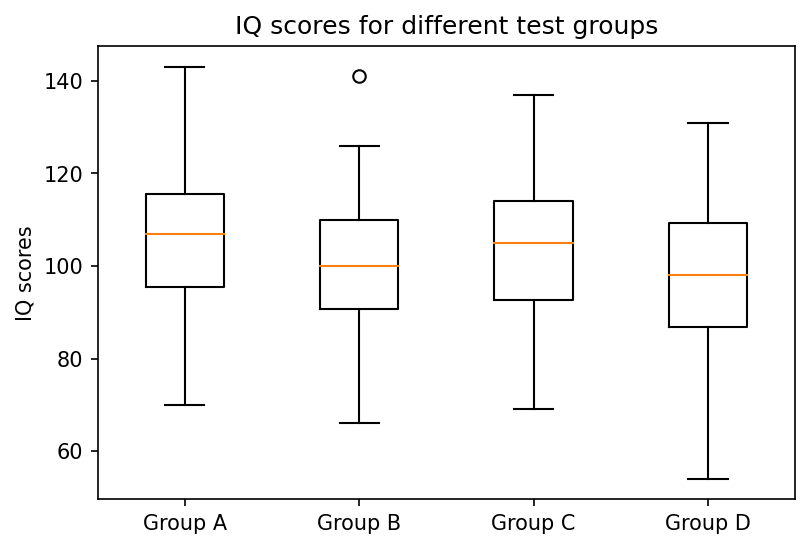

In [20]:
plt.figure(figsize=(6, 4), dpi=150)
plt.boxplot([group_a, group_b, group_c, group_d])
plt.title('IQ scores for different test groups')
ax = plt.gca()
ax.set_xticklabels(['Group A', 'Group B', 'Group C', 'Group D'])
plt.ylabel('IQ scores')
plt.show()

# Creating a Scatter Plot with Marginal Histograms

<b> Filter the data so that you end up with samples containing a body mass and maximum longevity as the given dataset, AnAge. Select all of the samples of the Aves class with a body mass of less than 20,000 </b>

In [21]:
data = pd.read_csv('Datasets/anage_data.csv')
data.head()

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
0,0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,...,NaN,0.19,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
1,1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,...,NaN,0.30,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN
2,2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,...,NaN,8.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN
3,3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,...,NaN,0.50,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN
4,4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,...,NaN,28.00,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN


In [22]:
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]

In [23]:
aves = data[data['Class'] == 'Aves']
aves = aves[aves[mass] < 20000]
aves.head()

,Unnamed: 0,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,...,Growth rate (1/days),Maximum longevity (yrs),Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K)
184,184,192,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Accipiter,nisus,Eurasian sparrowhawk,...,0.258,20.2,wild,medium,acceptable,NaN,NaN,0.95160,135.0,NaN
189,189,197,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Aquila,chrysaetos,Golden eagle,...,0.126,48.0,captivity,medium,acceptable,NaN,NaN,4.99290,3000.0,NaN
199,199,207,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Buteo,lineatus,Red-shouldered hawk,...,NaN,22.4,wild,medium,acceptable,NaN,NaN,2.11000,658.0,NaN
214,214,222,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Geranoaetus,melanoleucus,Black-chested buzzard-eagle,...,NaN,42.0,captivity,medium,acceptable,NaN,NaN,5.18870,2860.0,NaN
232,232,240,Animalia,Chordata,Aves,Accipitriformes,Accipitridae,Pernis,apivorus,Western honey-buzzard,...,NaN,29.0,wild,medium,acceptable,NaN,NaN,2.36428,652.0,NaN


<b> Create a Figure with a constrained layout. Create a gridspec of size 4x4. Create a scatter plot of size 3x3 and marginal histograms of size 1x3 and 3x1. Add labels and a Figure title </b>

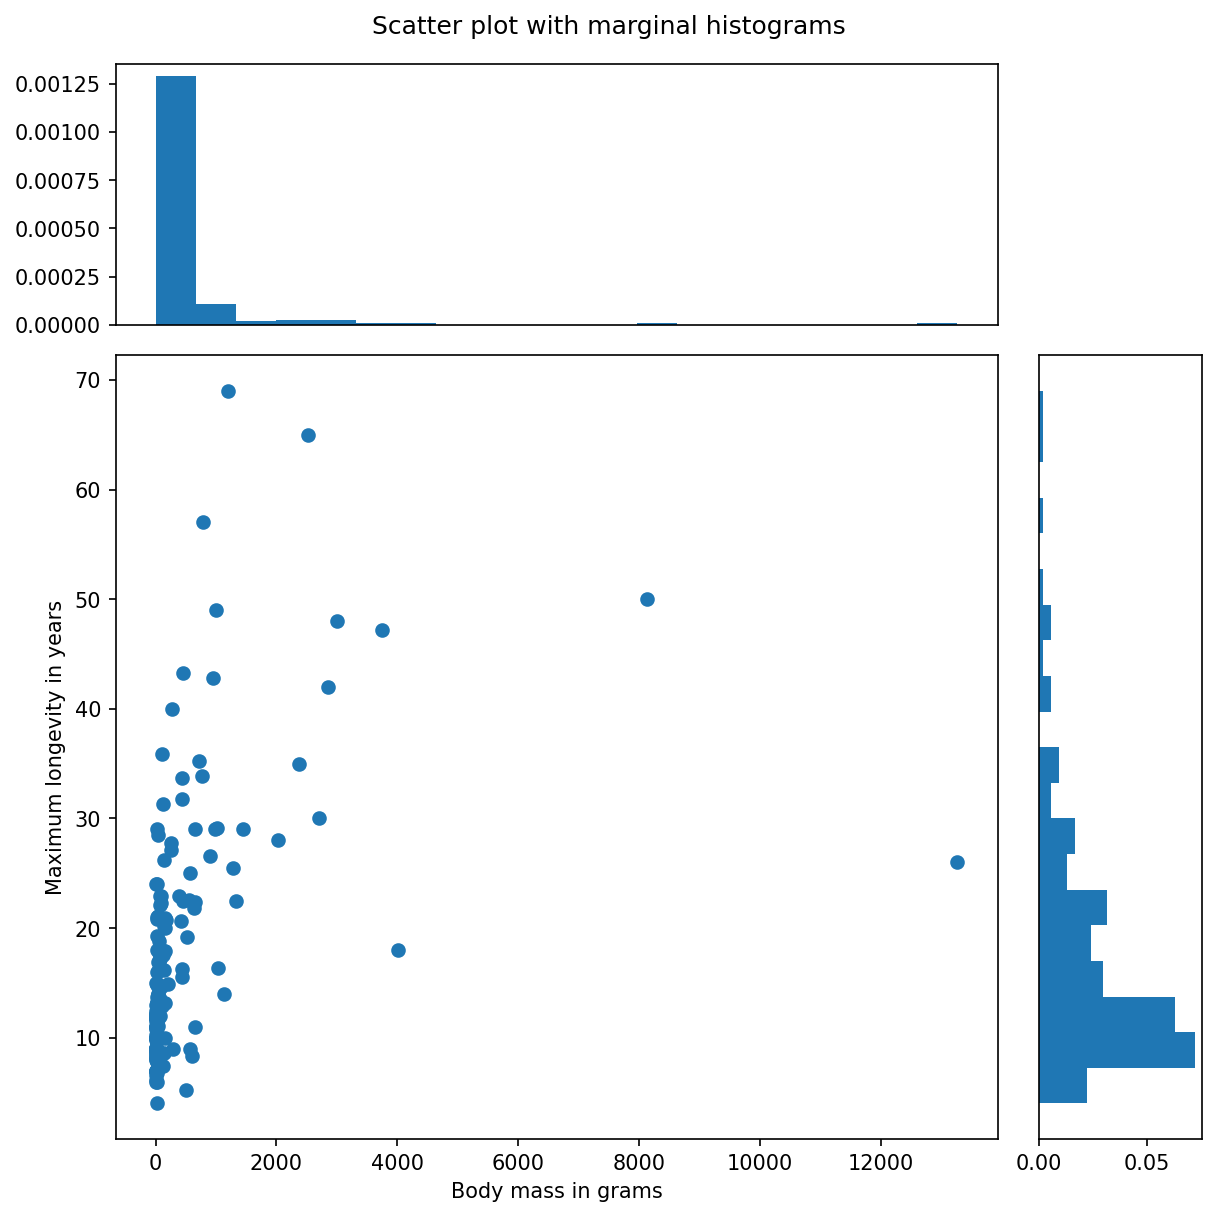

In [24]:
fig = plt.figure(figsize=(8, 8), dpi=150, constrained_layout=True)
# Create gridspec
gs = fig.add_gridspec(4, 4)
# Specify subplots
histx_ax = fig.add_subplot(gs[0, :-1])
histy_ax = fig.add_subplot(gs[1:, -1])
scatter_ax = fig.add_subplot(gs[1:, :-1])
# Create plots
scatter_ax.scatter(aves[mass], aves[longevity])
histx_ax.hist(aves[mass], bins=20, density=True)
histx_ax.set_xticks([])
histy_ax.hist(aves[longevity], bins=20, density=True, orientation='horizontal')
histy_ax.set_yticks([])
# Add labels and title
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
fig.suptitle('Scatter plot with marginal histograms')
# Show plot
plt.show()

If you encounter image formats that are not supported by Matplotlib, we recommend using the Pillow library to load the image. In Matplotlib, loading images is part of the image submodule

# Plotting Multiple Images in a Grid

<b> Import the necessary modules </b>

In [25]:
import os
import matplotlib.image as mpimg

<b> Load all four images </b>

In [26]:
img_filenames = sorted(os.listdir('Datasets/images'))
imgs = [mpimg.imread(os.path.join('Datasets/images', img_filename)) for img_filename in img_filenames]

<b> Visualize the images in a 2x2 grid. Remove the axes and give each image a label </b>

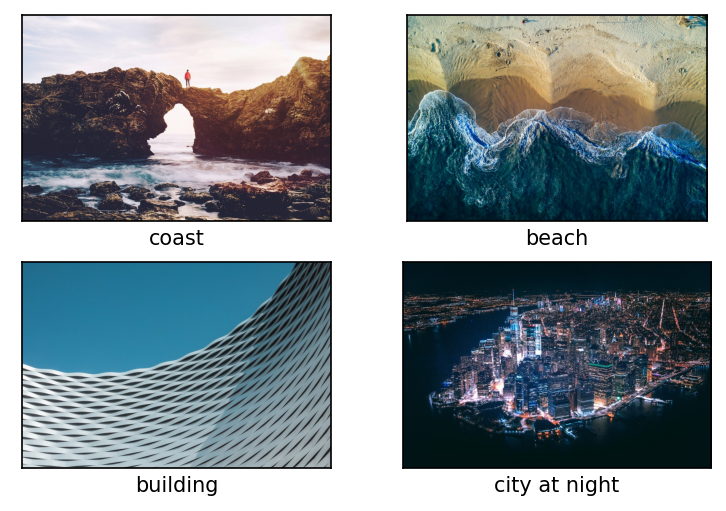

In [27]:
fig, axes = plt.subplots(2, 2)
fig.figsize = (6, 6)
fig.dpi = 150
axes = axes.ravel()
labels = ['coast', 'beach', 'building', 'city at night']

for i in range(len(imgs)):
    axes[i].imshow(imgs[i])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel(labels[i])